# Fourier Transform

## Image processing filters can operate in spatial domain or frequency domain. High pass filter is an example filter that operates in the frequency domain. Fourier transform converts an image (or any signal) from spatial (or time) domain to frequency domain. 

Text(0.5, 1.0, 'FFT of image')

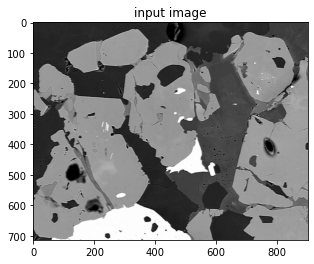

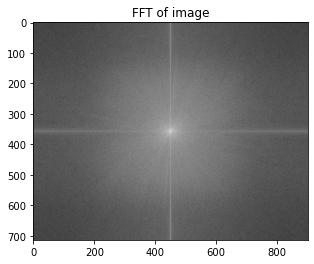

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

img = cv2.imread("images/BSE_Google.jpg",0)

plt.figure()
plt.imshow(img, cmap='gray')
plt.title('input image')

dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log((cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))+1)

plt.figure()
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('FFT of image')

In [10]:
# HPF mask
rows, cols = img.shape
crows, ccols = int(rows/2), int(cols/2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 80
centre = [crows, ccols]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - centre[0])**2 + (y - centre[1])**2 <= r*r
mask[mask_area] = 0

# Apply mask
fshift = dft_shift * mask

fshift_magnitude_spectrum = 20*np.log((cv2.magnitude(fshift[:,:,0], fshift[:,:,1]))+1)

f_ihift = np.fft.ifftshift(fshift) # shift back
img_back = cv2.idft(f_ihift) # inverse FFT
print(img_back.shape)

img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])


(714, 901, 2)


Text(0.5, 1.0, 'after inverse FFT')

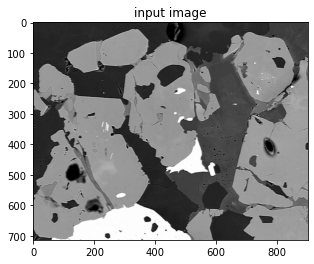

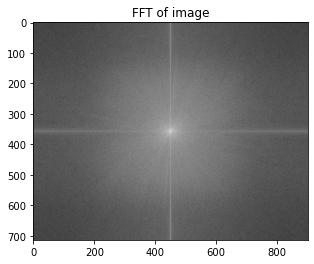

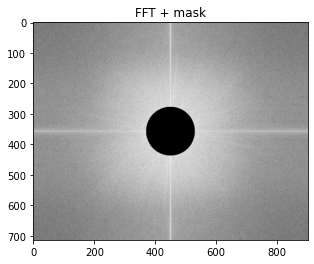

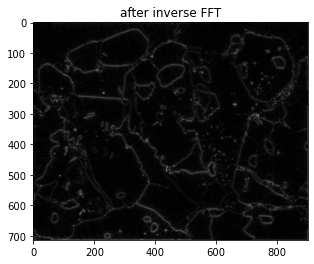

In [11]:
plt.figure()
plt.imshow(img, cmap='gray')
plt.title('input image')
plt.figure()
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('FFT of image')
plt.figure()
plt.imshow(fshift_magnitude_spectrum, cmap='gray')
plt.title('FFT + mask')
plt.figure()
plt.imshow(img_back, cmap='gray')
plt.title('after inverse FFT')